In [41]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


# 1.Data

In [42]:

df = pd.read_csv ('F:/ml/data.csv')
#print(df.info())
df.shape
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [43]:
x=df.drop (['Unnamed: 0','Photo','Flag','Club Logo'],axis=1)
#x.to_csv("F:/ml/FIFA.csv")
dff=pd.read_csv("F:/ml/FIFA.csv",encoding = "ISO-8859-1")
dff.columns
dff.drop(['Loaned From'],axis=1,inplace=True)


In [44]:
#DATA Analysis

In [45]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(dff['Nationality'].nunique()))
print(dff['Nationality'].value_counts().head(5))

#European Countries have most players

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [46]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(dff['Club'].nunique()))
print(dff['Club'].value_counts().head(5))

Total number of clubs : 651
Eintracht Frankfurt        33
FC Barcelona               33
Atlético Madrid            33
Wolverhampton Wanderers    33
Everton                    33
Name: Club, dtype: int64


In [47]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(dff.loc[dff['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(dff.loc[dff['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [48]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
      'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
      'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
      'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],dff.loc[dff[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modri?
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [49]:
#Cleaning some of values so that we can interpret them 
def value_to_int(dff_value):
    try:
        value =float(dff_value[1:-1])
        suffix = dff_value[-1:]

        if suffix == 'M':
            value = value*1000000
        elif suffix == 'K':
            value = value*1000
    except ValueError:
        value = 0
    return value

dff['Value'] = dff['Value'].apply(value_to_int)
dff['Wage'] = dff['Wage'].apply(value_to_int)

#dff['Release Clause'] = dff['Release Clause'].apply(value_to_int)
dff

,ID,Name,Age,Nationality,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Overall
0,158023,L. Messi,31,Argentina,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M,94
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,77000000.0,405000.0,2228,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M,94
2,190871,Neymar Jr,26,Brazil,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M,92
3,193080,De Gea,27,Spain,93,Manchester United,72000000.0,260000.0,1471,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M,91
4,192985,K. De Bruyne,27,Belgium,92,Manchester City,102000000.0,355000.0,2281,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M,91
5,183277,E. Hazard,27,Belgium,91,Chelsea,93000000.0,340000.0,2142,Right,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1M,91
6,177003,L. Modri?,32,Croatia,91,Real Madrid,67000000.0,420000.0,2280,Right,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4M,91
7,176580,L. Suárez,31,Uruguay,91,FC Barcelona,80000000.0,455000.0,2346,Right,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164M,91
8,155862,Sergio Ramos,32,Spain,91,Real Madrid,51000000.0,380000.0,2201,Right,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6M,91
9,200389,J. Oblak,25,Slovenia,93,Atlético Madrid,68000000.0,94000.0,1331,Right,...,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5M,90


In [50]:
#Top earners
print('Most valued player : '+str(dff.loc[dff['Value'].idxmax()][1]))
print('Highest earner : '+str(dff.loc[dff['Wage'].idxmax()][1]))

Most valued player : Neymar Jr
Highest earner : L. Messi


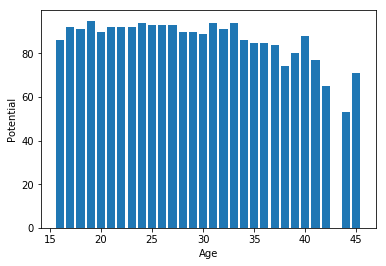

In [51]:
plt.bar(dff['Age'],dff['Potential'])
plt.xlabel("Age")
plt.ylabel("Potential")
plt.show()
#Potential tends to fall as you grow old 

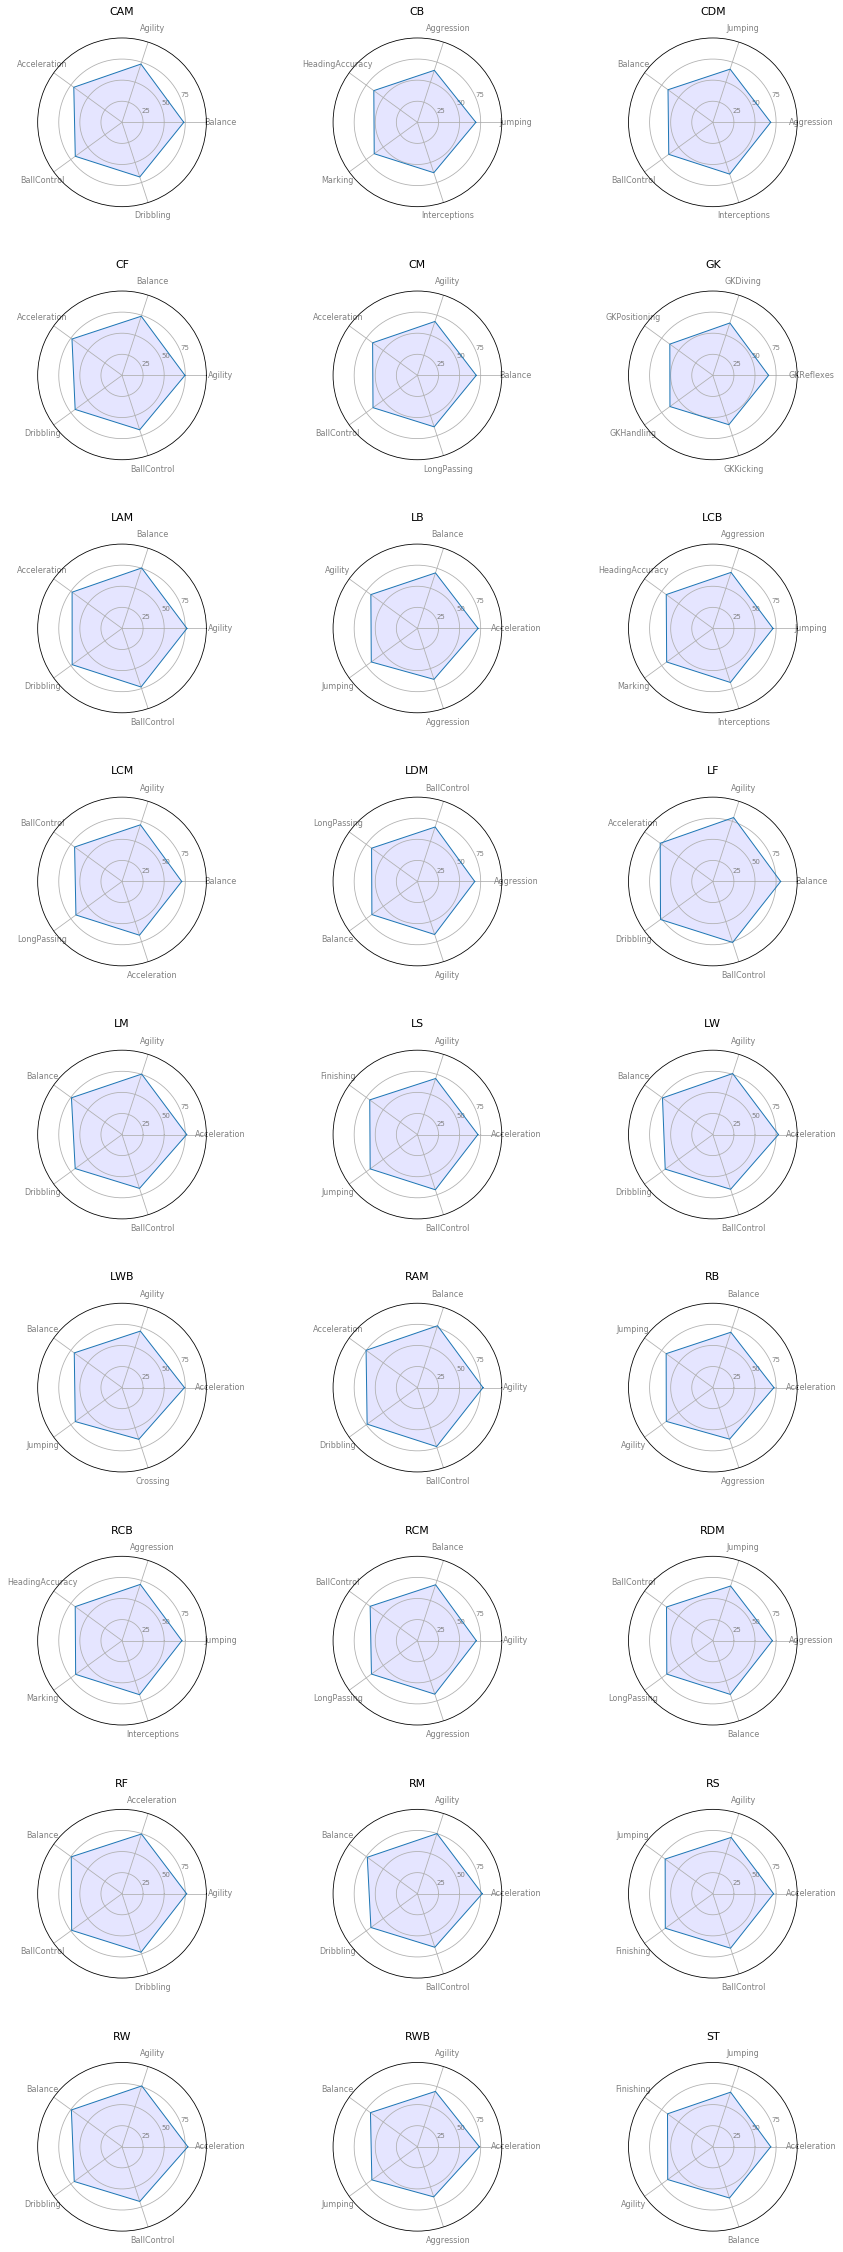

In [52]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in dff.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    #ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1
plt.show()

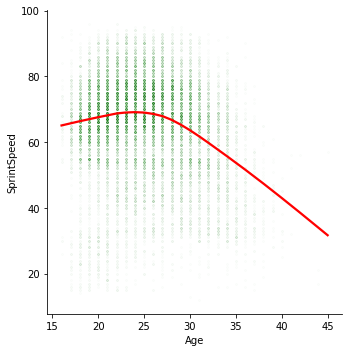

In [53]:
sns.lmplot(data = dff, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
plt.show()
#As the age increases the sprint speed decreases

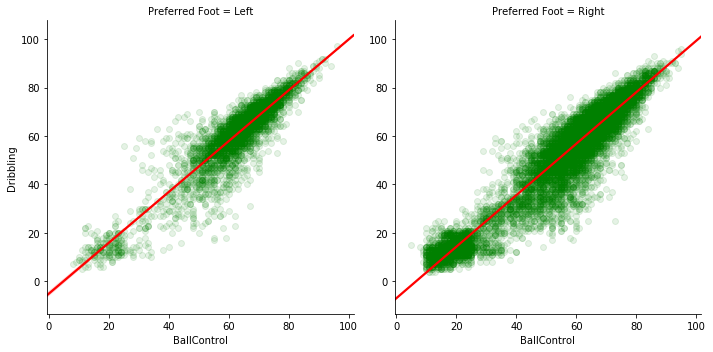

In [54]:

# Better is left-footed or rigth-footed players?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = dff,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'green'},
           line_kws={'color':'red'})
plt.show()

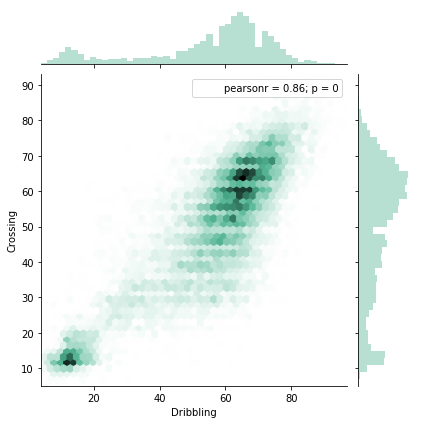

In [55]:
# Crossing vs. dribbling
sns.jointplot(x=dff['Dribbling'], y=dff['Crossing'], kind="hex", color="#4CB391");
plt.show()

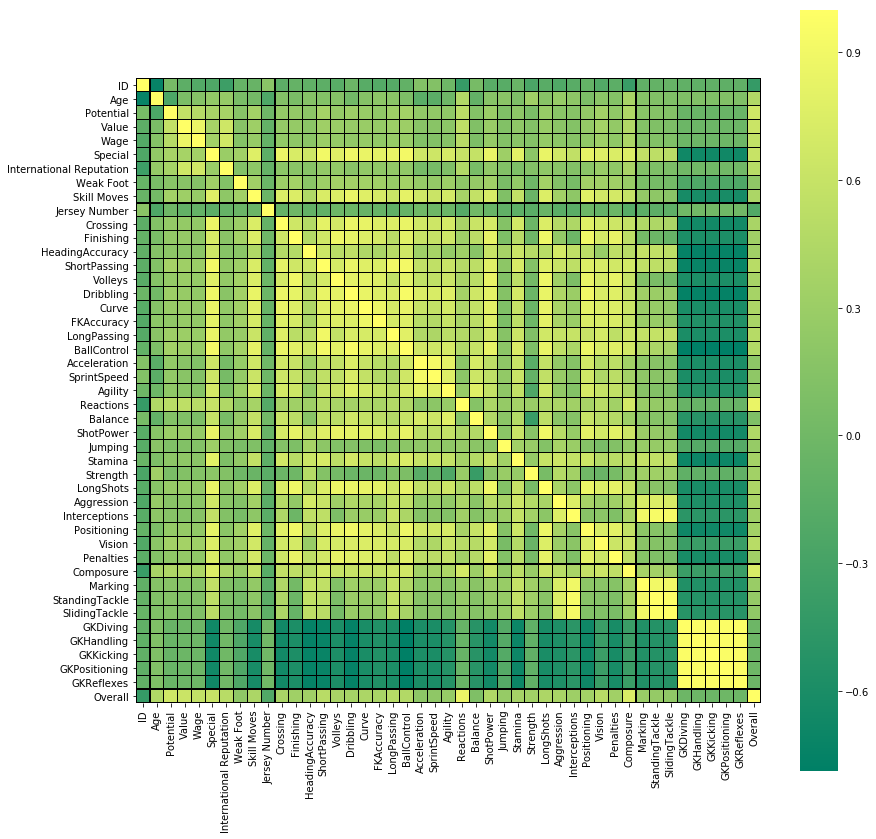

In [56]:
plt.figure(figsize=(14,14))
sns.heatmap(dff.corr(),linewidths=0.1,linecolor='black',square=True,cmap='summer')


plt.show()
#Lowest correlation among the goalkeeping side with other columns and high among themselves 
#High correlation between Dribbling, Volleys, Passing etc...

In [57]:
#DROP UNNECESSARY VALUES
#drop_cols = dff[28:54]
#dff = dff.drop( dff[28:54])
dff = dff.drop(['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',	'LB','LCB','CB','RCB','RB',
'ID','Jersey Number','Joined','Special','Body Type', 'Release Clause','Weight','Height','Contract Valid Until','Wage','Value','Name','Club'],axis=1)
#dff = dff.drop()
#dff.to_csv("F:/ml/final_fifa.csv")


In [58]:
dfff=pd.read_csv("F:/ml/final_fifa.csv",encoding="ISO-8859-1")
dfff.columns

Index(['Age', 'Nationality', 'Potential', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Real Face', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Overall'],
      dtype='object')

In [59]:
X=dff.iloc[:,:44]
Y=dff.iloc[:,44]
Y
X

,Age,Nationality,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,91,Right,4.0,4.0,4.0,High/ Medium,Yes,LF,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,32,Croatia,91,Right,4.0,4.0,4.0,High/ High,Yes,RCM,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,31,Uruguay,91,Right,5.0,4.0,3.0,High/ Medium,Yes,RS,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,32,Spain,91,Right,4.0,3.0,3.0,High/ Medium,Yes,RCB,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,25,Slovenia,93,Right,3.0,3.0,1.0,Medium/ Medium,Yes,GK,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


In [60]:
from sklearn.preprocessing import LabelEncoder
# for x
x_labelencoder = LabelEncoder ()
X.iloc[:,1] = x_labelencoder.fit_transform (X.iloc[:,1].astype(str))
X.iloc[:,3] = x_labelencoder.fit_transform (X.iloc[:,3].astype(str))
X.iloc[:,8] = x_labelencoder.fit_transform (X.iloc[:,8].astype(str))
X.iloc[:,9] = x_labelencoder.fit_transform (X.iloc[:,9].astype(str))
#Split the Work Rate Column in two
tempwork = X["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
X["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
X["WorkRate2"]= tempwork[1]
#Drop original columns used
X.drop(['Work Rate'], axis = 1,inplace=True)
#dff.drop(['Loaned From'],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
# for x
x_labelencoder = LabelEncoder ()
X.iloc[:,44] = x_labelencoder.fit_transform (X.iloc[:,44].astype(str))
X.iloc[:,43] = x_labelencoder.fit_transform (X.iloc[:,43].astype(str))

from sklearn.preprocessing import Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', axis = 0)  
missingValueImputer = missingValueImputer.fit (X)

X = missingValueImputer.transform(X)

X

array([[  31.,    6.,   94., ...,    8.,    2.,    2.],
       [  33.,  123.,   94., ...,   11.,    0.,    1.],
       [  26.,   20.,   93., ...,   11.,    0.,    2.],
       ..., 
       [  16.,   46.,   67., ...,   13.,    2.,    2.],
       [  17.,   46.,   66., ...,    9.,    2.,    2.],
       [  16.,   46.,   66., ...,    9.,    2.,    2.]])

In [61]:

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions



array([ 65.81457359,  70.00058615,  65.07825339, ...,  67.12350814,
        66.22855425,  60.67888368])

In [63]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.926987236816
RMSE : 1.8769184364


In [64]:
#explain equation now y=mx+c


m=model.coef_
c=model.intercept_
#print(m) #slope
#print(c)  

y=m*X+c  #here i is x as defined above
#print(y)


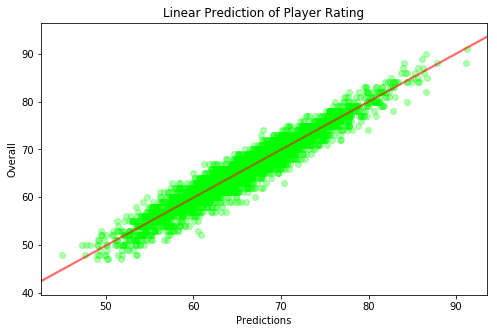

In [65]:
#Visualising the results
plt.figure(figsize=(8,5))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [66]:
#desicion tree classifer

x=dff[['Crossing','Finishing','ShortPassing','Dribbling']]
Y=dff[['Position']]
from sklearn.preprocessing import LabelEncoder

# for y
y_labelencoder = LabelEncoder ()
Y= y_labelencoder.fit_transform (Y.astype(str))

#Y=Y.reshape(-1,1)
print(X.shape)
Y.shape


(18207, 45)


(18207,)

In [67]:
from sklearn.preprocessing import Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', axis = 0)  
missingValueImputer = missingValueImputer.fit (x)

x = missingValueImputer.transform(x)
x


array([[ 84.,  95.,  90.,  97.],
       [ 84.,  94.,  81.,  88.],
       [ 79.,  87.,  84.,  96.],
       ..., 
       [ 25.,  40.,  38.,  45.],
       [ 44.,  50.,  42.,  51.],
       [ 41.,  34.,  48.,  43.]])

In [68]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)


from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3,random_state = 100)
#decision_tree.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=2)
decision_tree.fit(X_train, y_train)




predictValues =decision_tree.predict(X_test)


from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")
print(np.sqrt(metrics.mean_squared_error(y_test, predictValues)))





RMSE is:-
10.8882295168


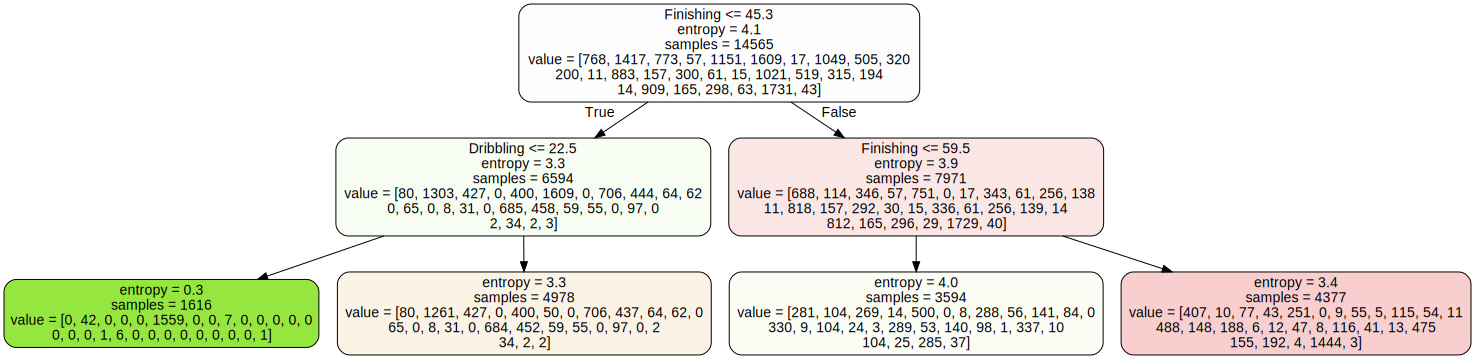

In [70]:
data_feature_names = [ 'Crossing','Finishing','ShortPassing','Dribbling']
Position=['Position']
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

FIFA = Source(tree.export_graphviz(decision_tree, out_file=None,filled=True ,feature_names=data_feature_names,rounded=True, precision = 1))

display(SVG(FIFA.pipe(format='svg' )))